In [0]:
!pip install captcha

     |████████████████████████████████| 102kB 2.5MB/s 


In [0]:
from capcha_gen import CaptchaGenOSFixed
from models import ResModule, CNNModule
from learner import LearnerGenerative

gen = CaptchaGenOSFixed()
I, t = gen.generateBatch(2)
a = gen.lossBatch(t, t)
learner = LearnerGenerative(gen, ResModule)
learner.save_params['name'] = 'Trained_Solver'
learner.reset(lr_start=1e-3)
learner.load()
o = learner.model(I)
learner.learn(2000, 10)
learner.save()
learner.plot()
learner.learn(1000, 20)
learner.save()
learner.plot()


In [0]:
learner.learn(500, 50)
learner.save()
learner.plot()
learner.learn(200, 100)
learner.save()
learner.plot()
learner.learn(100, 200)
learner.save()
learner.plot()

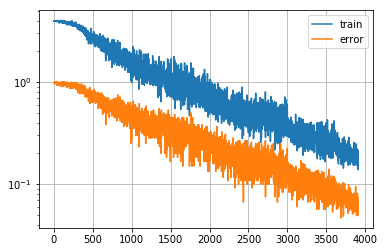

In [0]:
learner.plot()

In [0]:
I, t = gen.generateBatch(2)
o = learner.model(I)


In [0]:
output_string = []
target_string = []

for i in range(100):
  I, t = gen.generateBatch(100)
  o = learner.model(I)
  output_string.append(''.join([gen.tensor_to_string(x) for x in o]))
  target_string.append(''.join([gen.tensor_to_string(x) for x in t]))
  print(i)


In [0]:
output_chars = ''.join(output_string)
target_chars = ''.join(target_string)

In [0]:
import numpy as np
conf_mat = np.zeros((52,52))
for i in range(len(output_chars)):
  row = int(gen.string_to_index_list(output_chars[i]))
  col = int(gen.string_to_index_list(target_chars[i]))            
  conf_mat[row][col] += 1

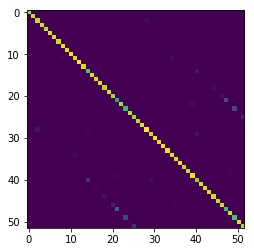

In [0]:
import matplotlib.pylab as plt
plt.imshow(conf_mat)

In [0]:
np.trace(conf_mat)/sum(sum(conf_mat))

0.9378166666666666

In [0]:
test = np.zeros(52)
for i in range(52):
  for j in range(52):
    test[np.abs(i-j)] += conf_mat[i][j]


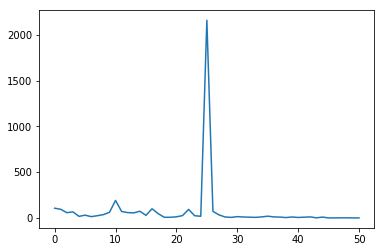

In [0]:
plt.plot(test[1:])

In [0]:
conf_mat2 = np.zeros((52,52))
for i in range(len(output_chars)):
  row = int(gen.string_to_index_list(output_chars[i]))
  col = int(gen.string_to_index_list(target_chars[i]))            
  if np.abs(row-col) != 26:
    conf_mat2[row][col] += 1
np.trace(conf_mat2)/sum(sum(conf_mat2))

0.9728220466451133

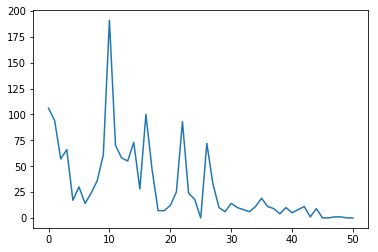

In [0]:
test2 = np.zeros(52)
for i in range(52):
  for j in range(52):
    test2[np.abs(i-j)] += conf_mat2[i][j]
plt.plot(test2[1:])